# Introduction 

- A **Support Vector Machine (SVM)** is a very powerful and versatile Machine Learning
model, capable of performing linear or nonlinear classification, regression, and even
outlier detection. 

-  SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

# Linear SVM Classification 

## IRIS Dataset

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

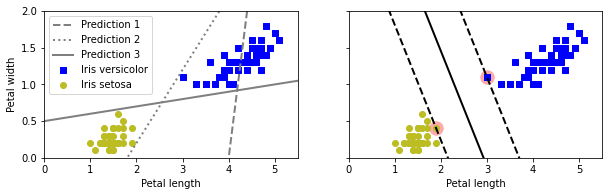

In [35]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, color="tab:gray", linestyle="dashed", linewidth=2, label="Prediction 1")
plt.plot(x0, pred_2, color="tab:gray", linestyle="dotted", linewidth=2, label="Prediction 2")
plt.plot(x0, pred_3, color="tab:gray", linestyle="solid", linewidth=2, label="Prediction 3")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], color = "blue", marker="s", label="Iris versicolor")
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], color = "tab:olive", marker="o", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], color = "blue", marker="s")
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], color = "tab:olive", marker="o")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])

plt.show()

- "The fundamental idea behind SVMs is best explained with some visualizations."
- The plots above shows part of the iris dataset.
- The two classes can clearly be separated easily with a straight line (they are linearly separable).

<u>Detailed Comments:</u>
- <u>Left Plot:</u>
 - The left plot shows the decision boundaries of three possible linear classifiers. 
 - The model whose decision boundary is represented by the dashed line is so bad that it
does not even separate the classes properly. 
 - The other two models work perfectly on
this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances. 

- <u>Right Plot:</u>
 - In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the
closest training instances as possible. 


- An SVM classifier can be thought of as a model fitting the widest possible street (represented by the parallel dashed lines) between the classes.
This is called **large margin classification**.

- Note: Adding more training instances “off the street” will not affect the decision
boundary at all: it is fully determined (or “supported”) by the instances located on the
edge of the street. These instances are called the **support vectors**.

## Soft Margin Classification 

- If we strictly impose that all instances be off the street and on the right side, this is
called **hard margin classification**. 
- There are two main issues with hard margin classification:
 1. It only works if the data is linearly separable.
 2. It is quite sensitive to outliers. 
 
We now plot the iris dataset just as above, but with one additional outlier:

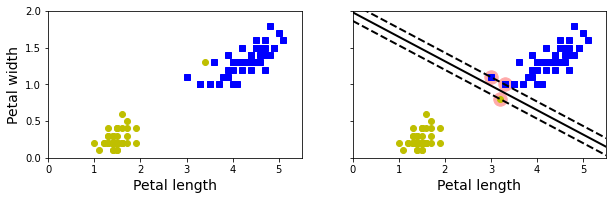

In [5]:
# Hard Margin Sensitivity to Outliers:

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)

plt.axis([0, 5.5, 0, 2])
plt.show()

- On the left, it is impossible to find a hard margin, and on the right the decision boundary
ends up very different from the one we saw in the earlier plot without the outlier, and it
will probably not generalize as well.

- To avoid these issues, it is preferable to use a more flexible model. 

- The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called **soft margin classification**.

In Scikit-Learn’s SVM classes, we can control this balance using the "C" hyperparameter: a smaller C value leads to a wider street but more margin violations:

In [44]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [45]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [46]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

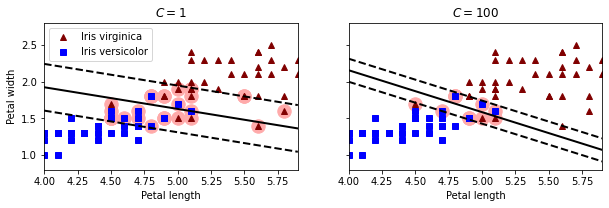

In [55]:
# Plotting Large vs Small Margin Using SkLearn:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^", color="maroon", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title("$C = {}$".format(svm_clf1.C))
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^", color="maroon")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title("$C = {}$".format(svm_clf2.C))
plt.axis([4, 5.9, 0.8, 2.8])
plt.show()

- The plots show the decision boundaries and margins of two soft margin SVM classifiers on a
nonlinearly separable dataset. 
 - On the left, using a low C value the margin is quite
large, but many instances end up on the street. 
 - On the right, using a high C value the
classifier makes fewer margin violations but ends up with a smaller margin. 
- However, it seems likely that the first classifier will generalize better: in fact even on this training set it makes fewer prediction errors, since most of the margin violations are actually on the correct side of the decision boundary.

# Nonlinear SVM Classification

- Although linear SVM classifiers are efficient and work surprisingly well in many
cases, many datasets are not even close to being linearly separable. 
- One approach to handling nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset:

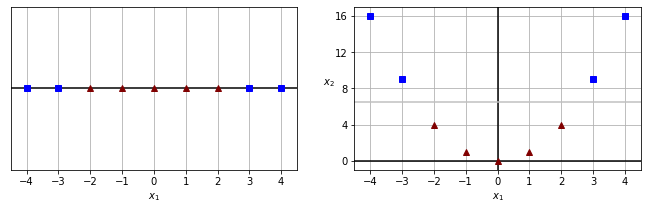

In [60]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "^", color="maroon")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "^", color="maroon")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], color="silver")
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

- Consider the left plot above: it represents a simple dataset with just one feature $x_1$.
- This dataset is not linearly separable, as you can see. But if you add a second feature $x_2 = (x_1)^2$, the resulting 2D dataset is perfectly linearly separable.

- To implement this idea using Scikit-Learn, we can create a `Pipeline` containing a `PolynomialFeatures` transformer, followed by a `StandardScaler` and a `LinearSVC`. 
- We can test this on the **moons
dataset**: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles.
 - We generate such a dataset here:

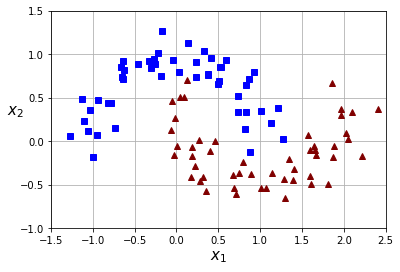

In [61]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^", color="maroon")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=15)
    plt.ylabel(r"$x_2$", fontsize=15, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [62]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

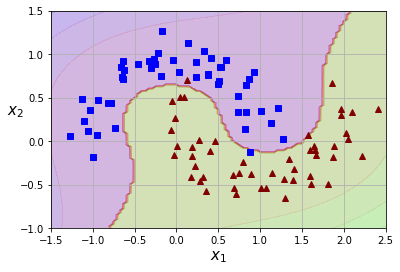

In [74]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Polynomial Kernel

- Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.

- Fortunately, when using SVMs, we can apply an almost miraculous mathematical technique called the **kernel** trick. 
 - It makes it possible to get the same result as if we added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since we don’t actually add any features. 
- This trick is implemented by the SVC class. Let’s test it on the moons dataset:


In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

In [ ]:
# SVM classifiers with a polynomial kernel:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$")
plt.ylabel("")

plt.show()

- On the left is an SVM classifier that's using a 3rd-degree polynomial kernel.  
- On the right is another SVM classifier using a 10th degree polynomial kernel. 
- <u>More Comments:</u>
 - Obviously, if your model is overfitting, we might want to reduce the polynomial degree. 
 - Conversely, if it is underfitting, we can try increasing it. 
 - The hyperparameter `coef0` controls how much the model is influenced by high-degree polynomials versus low-degree polynomials.

## Adding Similarity Features

- Another technique to tackle nonlinear problems is to add features computed using a **similarity function** that measures how much each instance resembles a particular
landmark. 
- For example, let’s take the one-dimensional dataset discussed earlier and add two landmarks to it at $x_1 = –2$ and $x_1 = 1$

- Next, let’s define the similarity function to be the **Gaussian Radial Basis Function (RBF)** with $γ = 0.3$

$$
\phi_{\gamma}(\mathbf{x}, \ell)=\exp \left(-\gamma\|\mathbf{x}-\ell\|^{2}\right)
$$

- It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at
the landmark). 

- Now we are ready to compute the new features. For example, let’s look
at the instance $x_1 = –1$: it is located at a distance of 1 from the first landmark, and 2
from the second landmark. Therefore its new features are $x_2 = \exp(–0.3 × 12) ≈ 0.74$ 
and $x_3 = exp (–0.3 × 22) ≈ 0.30$. 

- The plot on the right shows the transformed dataset (dropping the original features). As can be seen, it is now linearly separable.


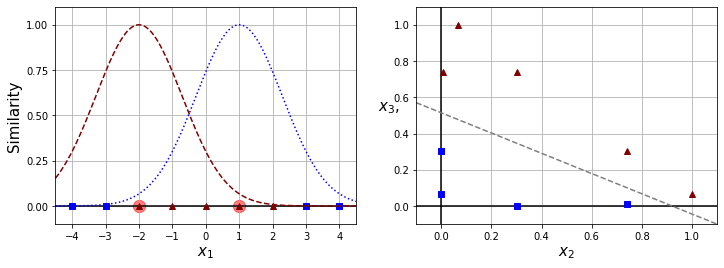

In [72]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "^", color="maroon")
plt.plot(x1s, x2s, "--", color="maroon")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=15)
plt.ylabel(r"Similarity", fontsize=15)

plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "^", color="maroon")
plt.xlabel(r"$x_2$", fontsize=15)
plt.ylabel(r"$x_3$, ", fontsize=15, rotation=0)

plt.plot([-0.1, 1.1], [0.57, -0.1], "--", color="tab:gray")
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

In [18]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


- The simplest approach to select landmarks is to create a landmark at the location of each and every instance in the dataset. 
- This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. 
- The downside is that a training set with $m$ instances and $n$ features gets transformed into a training set with $m$ instances and $m$ features (assuming we drop the original features). If our training set is very large, we end up with an equally large number of features.

## Gaussian RBF Kernel

- Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets. 
- However, once again the kernel trick does its SVM magic: it makes it possible to obtain a similar result as if you had added many similarity features, without actually having to add them.

- Let’s try the **Gaussian RBF kernel** using the SVC class:

In [19]:
rbf_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

- Generating SVM Classifiers Using an RBF Kernel:


In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C))
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

- The plots show models trained with different values of hyperparameters $\gamma$ and $C$.

<u>Comments:</u>
- Increasing $\gamma$ makes the bell-shape curve narrower, and as a result each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. 
- Conversely, a small $\gamma$
value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. 
- So $\gamma$ acts like a regularization
hyperparameter: if our model is overfitting, we should reduce it, and if it is underfitting, we should increase it (similar to the $C$ hyperparameter).


---

# Exercise 1


***Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.***

- We'll use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.

In [37]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

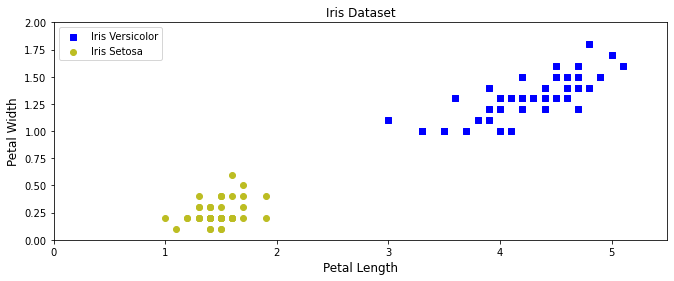

In [27]:
# Visualizing the Dataset:
plt.figure(figsize=(11, 4))
plt.scatter(X[:, 0][y==1], X[:, 1][y==1],  marker="s", color="b", label="Iris Versicolor") 
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", color="tab:olive", label="Iris Setosa")
plt.title("Iris Dataset", fontsize=12)
plt.xlabel("Petal Length", fontsize=12)
plt.ylabel("Petal Width", fontsize=12)
plt.legend()
plt.axis([0, 5.5, 0, 2])
plt.show()

In [28]:
# Training the Models:

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print(r"SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


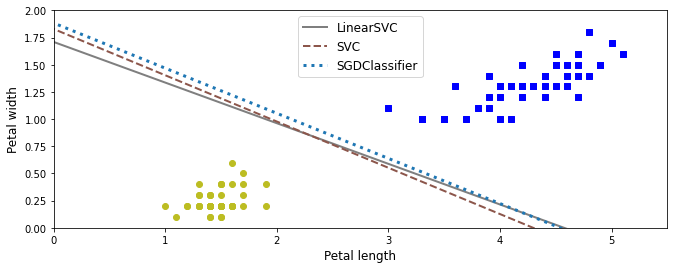

In [30]:
# Computing the slope and bias of each decision boundary:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transforming the decision boundary lines back to the original scale:
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Ploting all three decision boundaries:
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], color="tab:gray", linestyle="solid", linewidth=3, label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], color="tab:brown", linestyle="dashed", linewidth=3, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], color="tab:blue", linestyle="dotted", linewidth=3, label="SGDClassifier")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1],  marker="s", color="b") # label="Iris versicolor"
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", color="tab:olive") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.legend(loc="upper center", fontsize=12)
plt.axis([0, 5.5, 0, 2])

plt.show()


# Exercise 2

***Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. What accuracy can you reach?***

In [115]:
# Loading Dataset and Splitting:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [116]:
# Simple Linear SVM Classifier:
# Automatically uses the One-vs-All strategy:

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=42)

In [117]:
# Predictions (without scaling of data):
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

In [118]:
# Predictions (with scaling of data):
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9214

In [119]:
# SVM Model: SVC with RBF Kernel (Default):
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [120]:
# Predictions:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333